In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix as CM
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from time import time
from sklearn.model_selection import ShuffleSplit,learning_curve
import datetime

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

In [4]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,3.0,12.0,15.0,11.0,2.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,2.0,13.0,16.0,12.0,0.0,0.0
1,0.0,0.0,4.0,12.0,16.0,14.0,7.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,3.0,12.0,16.0,15.0,2.0,0.0
2,0.0,0.0,4.0,15.0,13.0,3.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,7.0,16.0,13.0,7.0,0.0,0.0
3,0.0,0.0,0.0,4.0,12.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0
4,0.0,0.0,0.0,3.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.0,2.0,11.0,14.0,10.0,1.0,0.0,0.0,0.0,6.0,...,7.0,0.0,0.0,1.0,12.0,16.0,16.0,10.0,0.0,0.0
1253,0.0,0.0,1.0,9.0,16.0,6.0,0.0,0.0,0.0,4.0,...,14.0,3.0,0.0,0.0,0.0,8.0,16.0,16.0,13.0,3.0
1254,0.0,0.0,0.0,2.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,13.0,2.0,0.0,0.0
1255,0.0,0.0,7.0,12.0,11.0,1.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,8.0,12.0,16.0,13.0,2.0,0.0


In [5]:
gnb = GaussianNB().fit(X_train, Y_train)

In [6]:
gnb.score(X_test, Y_test)

0.8592592592592593

In [7]:
Y_pred = gnb.predict(X_test)

In [8]:
CM(Y_test, Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

In [23]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"] 
model = [GaussianNB(),DecisionTreeClassifier(),SVC(gamma=0.001)
         ,RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

In [10]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim, #设置纵坐标的取值范围
                        cv, #交叉验证
                        n_jobs #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
           , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

00:00:609251
00:00:781541
00:05:742176
00:05:747637
00:03:383200


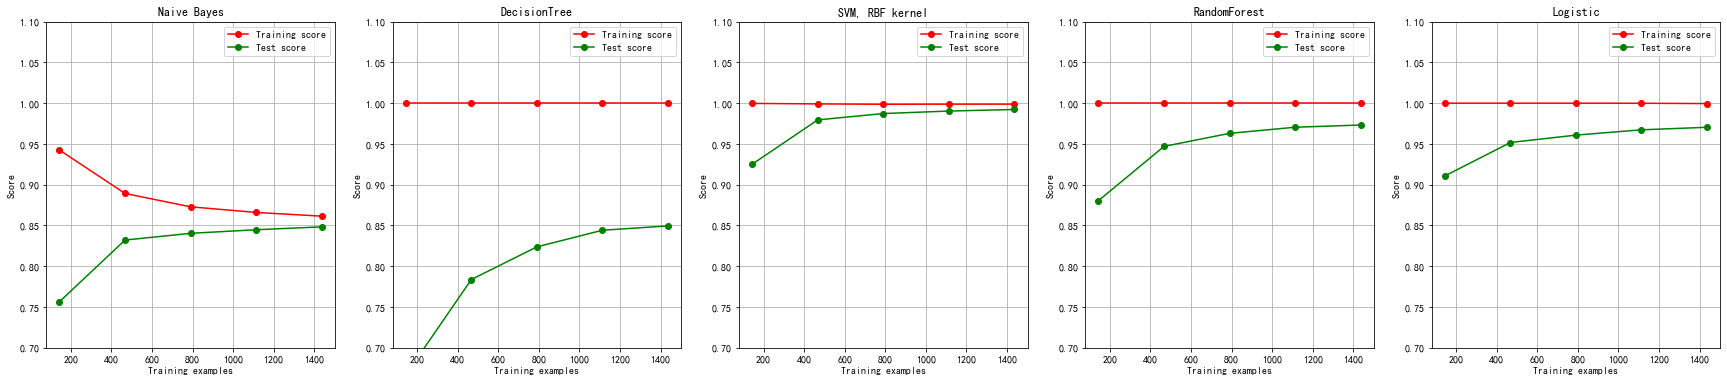

In [30]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for i, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator,title_,X,y,axes[i],ylim=[0.7,1.1],cv=cv,n_jobs=5)
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))
plt.show()

In [36]:
s = set()

In [37]:
hasattr(s,'append')

False

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MultinomialNB()

In [1]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss, recall_score, roc_auc_score

In [2]:
class_1 = 50000
class_2 = 500
centers = [[0.0,0.0],[5.0,5.0]]
clusters_std = [3,1]
X, y = make_blobs(n_samples=[class_1, class_2]
                 ,centers=centers
                 ,cluster_std=clusters_std
                 ,random_state=0
                 ,shuffle=False)

In [5]:
X.shape

(50500, 2)

In [16]:
name = ['高斯','多项式','伯努利']
model = [GaussianNB(), MultinomialNB(), BernoulliNB()]

In [17]:
for name, clf in zip(name, model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=420)
    
    if name != '高斯':
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(X_train)
        X_train = kbs.transform(X_train)
        X_test = kbs.transform(X_test)
        
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)[:,1]
    score = clf.score(X_test, Y_test)
    print(name)
    print("\tBrier:{:.3f}".format(brier_score_loss(Y_test,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Y_test,y_pred)))
    print("\tAUC:{:.3f}".format(roc_auc_score(Y_test,proba)))

高斯
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
多项式
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
伯努利
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
